<a href="https://colab.research.google.com/github/abdulaihalidu/Machine-learning-Data-science-Projects/blob/main/Classifying_images_using_pre_trained_models_from_keras_%26_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [79]:
import numpy as np
import tensorflow as tf

from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.applications.vgg19 import VGG19, preprocess_input as vgg19_preprocess_input, decode_predictions as decode_vgg19

from IPython.core.display import display

#Constants

In [80]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'
FILE_4 = '04 Horse.jpg'
FILE_5 = '05 City.jpg'
FILE_6 = '06 Feet.jpg'
FILE_7 = '07 Stairs.jpg'
FILE_8 = '08 Doorway.jpg'
FILE_9 = '09 Ice Cream.jpg'
FILE_10 = '10 Red Shoes.jpg'
FILE_11 = '11 Shoe.jpg'

In [81]:
images = [FILE_1, FILE_2, FILE_3, FILE_4, FILE_5, FILE_6, FILE_7,
          FILE_8, FILE_9, FILE_10, FILE_11]

#Preprocessing Images

In [82]:
def preprocessInputImage(filename):
  img = load_img(filename, target_size=(299, 299))
  img_arr = img_to_array(img)
  expanded_img_arr = np.expand_dims(img_arr, axis=0)
  preprocessed_img_arr = preprocess_input(expanded_img_arr)
  return preprocessed_img_arr


#Load InceptionResnet

In [83]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')

CPU times: user 5.75 s, sys: 360 ms, total: 6.11 s
Wall time: 5.71 s


In [84]:
inception_model.graph = tf.compat.v1.get_default_graph()

#Making Predictions

In [85]:
def make_prediction(file_name):
    predict_pic = inception_model.predict(preprocessInputImage(file_name))
    display(load_img(file_name)) # display the current image being predicted
    return decode_predictions(predict_pic)



In [86]:
def display_results(images_list):
  for filename in images_list:
    display(make_prediction(filename))
    print('') # for spacing between predictions output

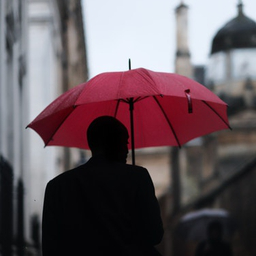

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.0010572354),
  ('n03220513', 'dome', 0.0010310997)]]

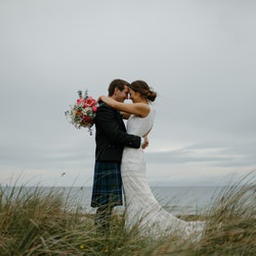

[[('n10148035', 'groom', 0.7042387),
  ('n03450230', 'gown', 0.116695516),
  ('n11879895', 'rapeseed', 0.016582701),
  ('n09421951', 'sandbar', 0.0127906585),
  ('n03534580', 'hoopskirt', 0.007287779)]]

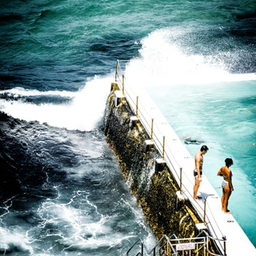

[[('n02894605', 'breakwater', 0.5370845),
  ('n04347754', 'submarine', 0.123474844),
  ('n02814860', 'beacon', 0.042309176),
  ('n03662601', 'lifeboat', 0.031352386),
  ('n03160309', 'dam', 0.016830517)]]

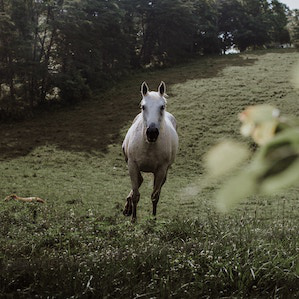

[[('n02389026', 'sorrel', 0.44831738),
  ('n02412080', 'ram', 0.029899044),
  ('n02106030', 'collie', 0.019694572),
  ('n04604644', 'worm_fence', 0.016888143),
  ('n04049303', 'rain_barrel', 0.013531374)]]

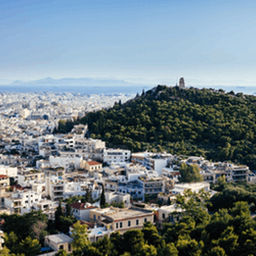

[[('n09193705', 'alp', 0.31008863),
  ('n09468604', 'valley', 0.23449728),
  ('n09332890', 'lakeside', 0.039152957),
  ('n09428293', 'seashore', 0.035602525),
  ('n09246464', 'cliff', 0.03141395)]]

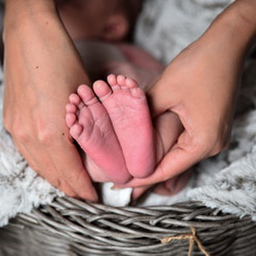

[[('n03188531', 'diaper', 0.096486874),
  ('n03482405', 'hamper', 0.071163215),
  ('n02808304', 'bath_towel', 0.055679806),
  ('n04336792', 'stretcher', 0.053134605),
  ('n02808440', 'bathtub', 0.045097526)]]

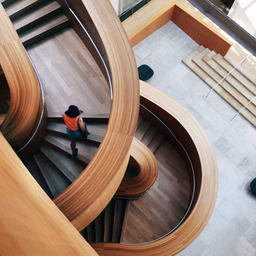

[[('n03065424', 'coil', 0.88973063),
  ('n02788148', 'bannister', 0.09383373),
  ('n03854065', 'organ', 0.0017714775),
  ('n03661043', 'library', 0.0014665519),
  ('n03956157', 'planetarium', 0.00080693176)]]

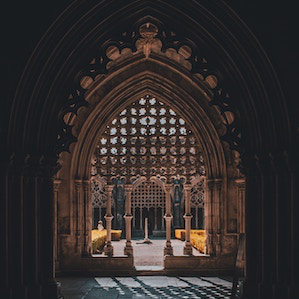

[[('n02699494', 'altar', 0.53255004),
  ('n03028079', 'church', 0.14719611),
  ('n04523525', 'vault', 0.10892181),
  ('n03781244', 'monastery', 0.061171714),
  ('n04429376', 'throne', 0.0064773173)]]

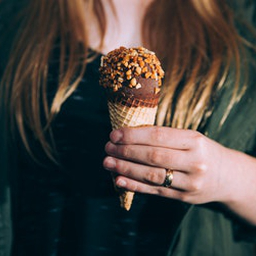

[[('n07615774', 'ice_lolly', 0.45823863),
  ('n07614500', 'ice_cream', 0.18706729),
  ('n03720891', 'maraca', 0.068991825),
  ('n03729826', 'matchstick', 0.06425372),
  ('n03759954', 'microphone', 0.02150764)]]

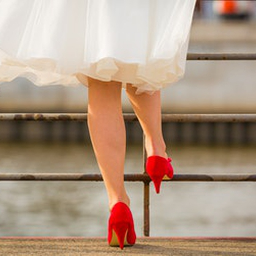

[[('n03534580', 'hoopskirt', 0.52918243),
  ('n03450230', 'gown', 0.17865232),
  ('n03770439', 'miniskirt', 0.04750478),
  ('n03866082', 'overskirt', 0.034110606),
  ('n03124043', 'cowboy_boot', 0.014219957)]]

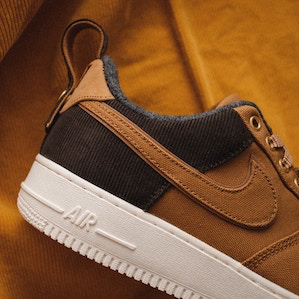

[[('n04133789', 'sandal', 0.28393123),
  ('n04120489', 'running_shoe', 0.2034971),
  ('n03680355', 'Loafer', 0.1001804),
  ('n04200800', 'shoe_shop', 0.062399257),
  ('n04026417', 'purse', 0.032476902)]]

In [87]:
display_results(images)

#Making Predictions Using the VGG19 Model

In [88]:
def preprocessInputImageVGG19(filename):
  img = load_img(filename, target_size=(224, 224))
  img_arr = img_to_array(img)
  expanded_img_arr = np.expand_dims(img_arr, axis=0)
  preprocessed_img_arr = vgg19_preprocess_input(expanded_img_arr)
  return preprocessed_img_arr

In [89]:
%%time
vgg19_model = VGG19() # uses imagenet by default

CPU times: user 3.12 s, sys: 859 ms, total: 3.98 s
Wall time: 2.85 s


In [95]:
def make_prediction_vgg19(file_name):
    predict_pic = vgg19_model.predict(preprocessInputImageVGG19(file_name))
    display(load_img(file_name)) # display the current image being predicted
    return decode_vgg19(predict_pic)

In [96]:
def display_results_vgg19(images_list):
  for filename in images_list:
    display(make_prediction_vgg19(filename))
    print('') # for spacing between predictions output

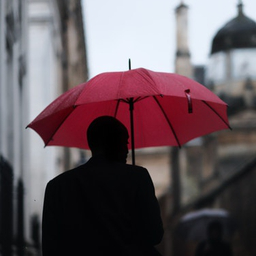

[[('n04507155', 'umbrella', 0.99998033),
  ('n03599486', 'jinrikisha', 2.9043706e-06),
  ('n03637318', 'lampshade', 2.5537774e-06),
  ('n07734744', 'mushroom', 1.6436775e-06),
  ('n03888257', 'parachute', 1.2324566e-06)]]

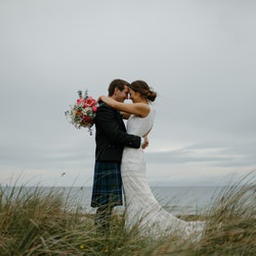

[[('n10148035', 'groom', 0.21170989),
  ('n02100735', 'English_setter', 0.044719268),
  ('n09399592', 'promontory', 0.036268894),
  ('n03450230', 'gown', 0.035969302),
  ('n02102040', 'English_springer', 0.035922628)]]

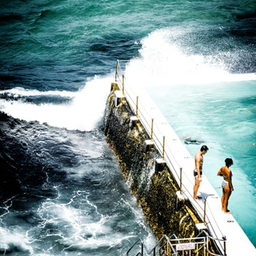

[[('n04347754', 'submarine', 0.16831146),
  ('n02894605', 'breakwater', 0.12554656),
  ('n03662601', 'lifeboat', 0.09670136),
  ('n09399592', 'promontory', 0.084240325),
  ('n02981792', 'catamaran', 0.08419342)]]

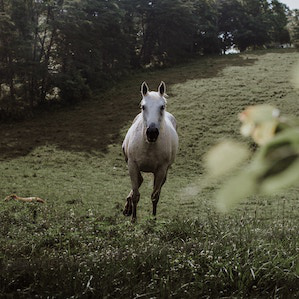

[[('n02412080', 'ram', 0.7342516),
  ('n02415577', 'bighorn', 0.116094075),
  ('n02403003', 'ox', 0.017533267),
  ('n02437616', 'llama', 0.011443047),
  ('n02091134', 'whippet', 0.009351138)]]

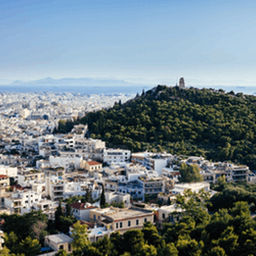

[[('n09399592', 'promontory', 0.4123736),
  ('n09428293', 'seashore', 0.25915873),
  ('n09246464', 'cliff', 0.11766643),
  ('n09193705', 'alp', 0.07332306),
  ('n09332890', 'lakeside', 0.049131937)]]

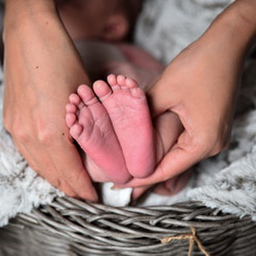

[[('n07880968', 'burrito', 0.3597473),
  ('n01817953', 'African_grey', 0.09527819),
  ('n03992509', "potter's_wheel", 0.047266223),
  ('n07860988', 'dough', 0.03768624),
  ('n01748264', 'Indian_cobra', 0.026607467)]]

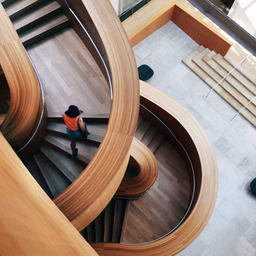

[[('n03065424', 'coil', 0.9249146),
  ('n02788148', 'bannister', 0.016366672),
  ('n02795169', 'barrel', 0.013601809),
  ('n04099969', 'rocking_chair', 0.009315822),
  ('n03125729', 'cradle', 0.006469759)]]

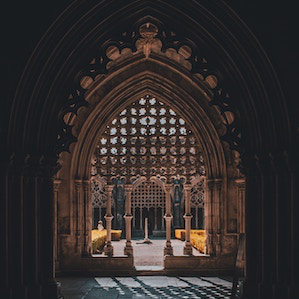

[[('n04523525', 'vault', 0.48442155),
  ('n02699494', 'altar', 0.22229108),
  ('n03781244', 'monastery', 0.12855862),
  ('n03028079', 'church', 0.06518844),
  ('n03998194', 'prayer_rug', 0.020554593)]]

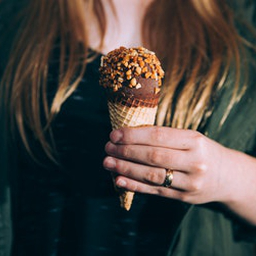

[[('n03724870', 'mask', 0.1983438),
  ('n01943899', 'conch', 0.09400181),
  ('n04259630', 'sombrero', 0.0832243),
  ('n03720891', 'maraca', 0.044131372),
  ('n04584207', 'wig', 0.040169466)]]

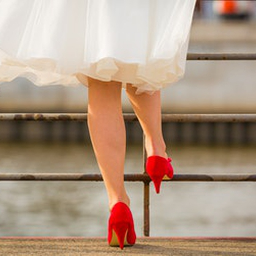

[[('n03958227', 'plastic_bag', 0.29929298),
  ('n04507155', 'umbrella', 0.27013764),
  ('n03450230', 'gown', 0.07638505),
  ('n02869837', 'bonnet', 0.043768764),
  ('n07615774', 'ice_lolly', 0.033021953)]]

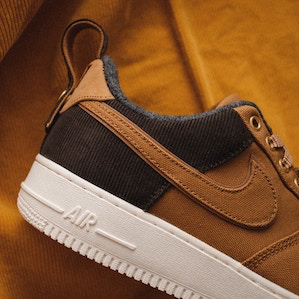

[[('n04133789', 'sandal', 0.30766183),
  ('n04026417', 'purse', 0.28260303),
  ('n03709823', 'mailbag', 0.09241975),
  ('n03908618', 'pencil_box', 0.065796435),
  ('n03680355', 'Loafer', 0.046173863)]]

In [97]:
display_results_vgg19(images)